# <h1 style="color: #FF8C00;">Portfolio Analysis: Python Challenge</h1>

---

**This challenge** represents a practical tech assignment designed to test your skills in portfolio analysis. Portfolio analysis is a systematic way to evaluate investment portfolios to optimize asset allocation and management. It involves a variety of financial metrics and visualizations to assess the performance and risk of different financial assets.

- In this exercise, you will be required to perform a series of calculations and create visualizations to analyze a set of financial assets.
- Your task is to develop the necessary code to accomplish each of these tasks effectively.
- This challenge is an opportunity to demonstrate your ability to apply Python programming skills in a real-world financial context.

## <h2 style="color: #FF8C00;">Instructions:</h2>

- **Collaboration**: You are working in **pairs**, so collaborate to create a comprehensive `README` file that outlines your project, methodologies, and findings.
- **Presentation**: Prepare and deliver a presentation that summarizes your analysis, demonstrating the depth and breadth of your work.
- **Python scripts**: You can use the this notebook or the `EDA_template` as template for your findings, but you'll have to deliver a different notebook to GitHub.
- **Extended Analysis**: Dive deeper into the data to uncover additional insights. Push the boundaries of your analysis to explore complex interactions within the portfolio.


---



# <h1 style="color: #FF8C00;">Libraries</h1>

In [1]:
# 📚 Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import gdown

In [2]:
# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
import warnings
warnings.filterwarnings('ignore') # ignore warnings



---



# Data Extraction

In [3]:
# List files in the current directory
files = os.listdir()
# Print the list of files
files

['.config',
 'asset_price_data (1).csv',
 'asset_information_data (1).csv',
 'portfolio_weights (1).csv',
 'sample_data']

In [4]:
# Define dataframes (df's):
asset_information_df = pd.DataFrame()
asset_price_df = pd.DataFrame()
portfolio_weights_df = pd.DataFrame()

In [5]:
# Iterate over files
for file in files:
    if file.endswith('.csv'):
        # Read CSV file
        df = pd.read_csv(file)

        # Assign dataframe to corresponding variable
        if 'asset_information' in file:
            asset_information_df = df
        elif 'asset_price' in file:
            asset_price_df = df
        elif 'portfolio_weights' in file:
            portfolio_weights_df = df

In [6]:
asset_information_df.head()

,Name,Family
0,Asset1,Fixed Income
1,Asset2,Fixed Income
2,Asset3,Equity
3,Asset4,Equity
4,Asset5,Alternative


# <h1 style="color: #FF8C00;">Exercise 1: Data Loading and Price Charting</h1>

---

You are tasked with loading and analyzing financial data, which is foundational for effective portfolio management. Begin by loading the file named `asset_price_data.csv`, containing essential pricing information for various financial assets.

Post data loading, your objective is to visualize this data through a time series graph.The integrity of your analysis depends heavily on your ability to visualize trends accurately while ensuring all asset price series begin at a uniform value.

In [7]:
# Asset price data:
asset_price_df

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,231.5061,55.875,25.649222,302.93,50.89
1,2019-01-03,231.0356,54.977,25.503047,302.11,50.41
2,2019-01-04,230.4026,56.129,26.147133,301.77,51.38
3,2019-01-07,230.0543,56.838,25.955277,302.33,52.14
4,2019-01-08,229.7012,56.895,26.137997,303.42,52.13
...,...,...,...,...,...,...
778,2021-12-27,249.9207,103.956,38.820000,NaN,70.11
779,2021-12-28,249.9368,104.526,39.115000,NaN,70.03
780,2021-12-29,248.7215,104.360,38.855000,342.46,69.81
781,2021-12-30,248.5485,104.663,38.985000,342.55,69.91


In [8]:
asset_price_df.shape

(783, 6)

In [9]:
asset_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    783 non-null    object 
 1   Asset1  770 non-null    float64
 2   Asset2  770 non-null    float64
 3   Asset3  770 non-null    float64
 4   Asset4  734 non-null    float64
 5   Asset5  763 non-null    float64
dtypes: float64(5), object(1)
memory usage: 36.8+ KB


In [10]:
# Cleaning [date] column to 'datetime':
asset_price_df['date'] = pd.to_datetime(asset_price_df['date'])

## Time Series Graph

In [11]:
# Variables for the plot:
dates = asset_price_df['date']
asset1_prices = asset_price_df['Asset1']
asset2_prices = asset_price_df['Asset2']
asset3_prices = asset_price_df['Asset3']
asset4_prices = asset_price_df['Asset4']
asset5_prices = asset_price_df['Asset5']

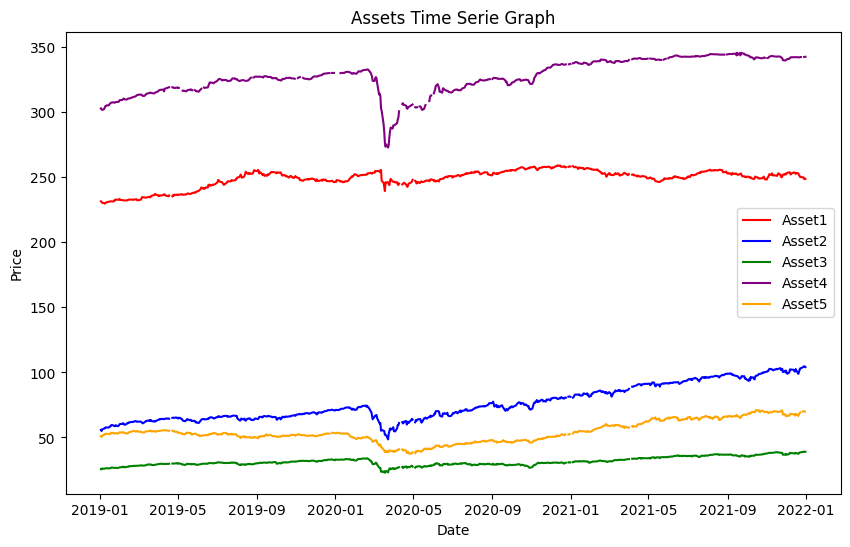

In [12]:
# Plot each asset:
plt.figure(figsize=(10, 6))
plt.plot(dates, asset1_prices, label='Asset1', color='red')
plt.plot(dates, asset2_prices, label='Asset2', color='blue')
plt.plot(dates, asset3_prices, label='Asset3', color='green')
plt.plot(dates, asset4_prices, label='Asset4', color='purple')
plt.plot(dates, asset5_prices, label='Asset5', color='orange')

# Plot titles:
plt.title('Assets Time Serie Graph')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

#<h1 style="color: #FF8C00;">Exercise 2: Daily Percentage Returns</h1>

---

You are required to calculate the daily percentage returns for each financial asset. Utilize this data to accomplish the following:
- Calculate the correlation matrix for the five assets.
- Create a scatter plot comparing the returns of two specific assets.

## Asset Daily returns:

In [13]:
# Set 'date' columns as index
asset_price_df.set_index('date', inplace=True)

In [14]:
# Daily returns calculation:
daily_returns_assets = asset_price_df.pct_change()
daily_returns_assets.head()

,Asset1,Asset2,Asset3,Asset4,Asset5
date,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.002032,-0.016072,-0.005699,-0.002707,-0.009432
2019-01-04,-0.002740,0.020954,0.025255,-0.001125,0.019242
2019-01-07,-0.001512,0.012632,-0.007338,0.001856,0.014792
2019-01-08,-0.001535,0.001003,0.007040,0.003605,-0.000192


## Correlation Matrix:

In [15]:
# Calculate correlation matrix for daily returns:
correlation_matrix_daily_returns = daily_returns_assets.corr()
correlation_matrix_daily_returns

,Asset1,Asset2,Asset3,Asset4,Asset5
Asset1,1.000000,-0.088341,-0.061253,0.102252,-0.106484
Asset2,-0.088341,1.000000,0.852491,0.526634,0.591399
Asset3,-0.061253,0.852491,1.000000,0.511550,0.557414
Asset4,0.102252,0.526634,0.511550,1.000000,0.421155
Asset5,-0.106484,0.591399,0.557414,0.421155,1.000000


<Axes: >

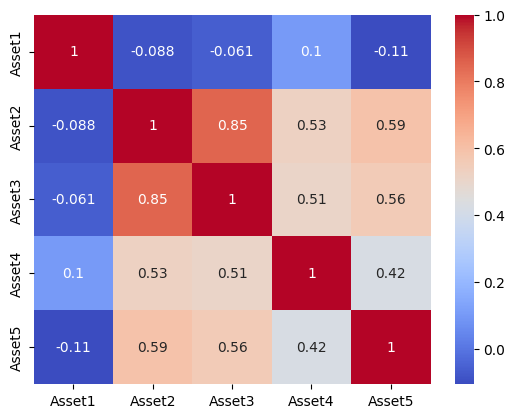

In [16]:
# Testing heatmap with dialy returns correlation:
sns.heatmap(correlation_matrix_daily_returns, annot=True, cmap='coolwarm')

## Scatter Plot (two assets)

Testing Asset 2 (Fixed Income) vs. Asset 3 (Equity)

In [17]:
# Extracting Asset (2 & 3) data:
asset2_daily_returns = daily_returns_assets['Asset2']
asset3_daily_returns = daily_returns_assets['Asset3']

<Axes: title={'center': 'Asset (2 & 3) Daily returns Comparison'}, xlabel='Asset2', ylabel='Asset3'>

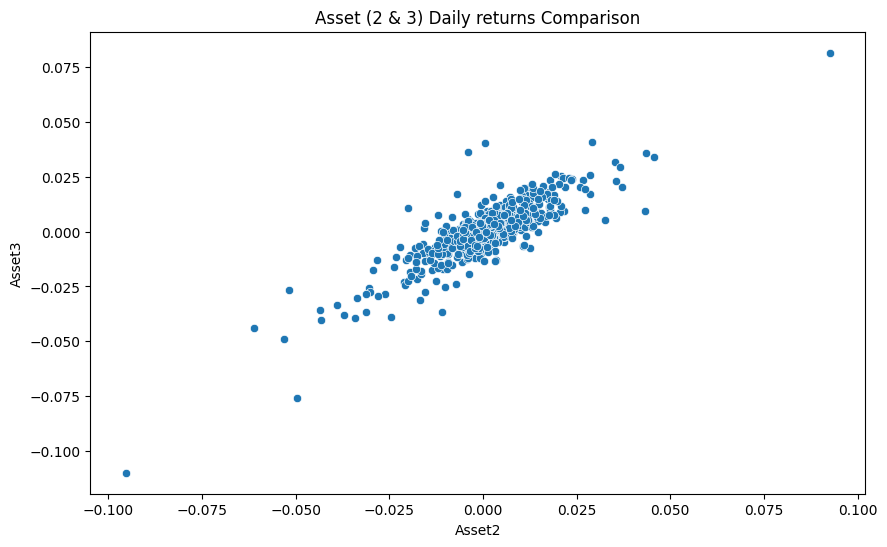

In [18]:
# Create Scatter Plot:
plt.figure(figsize=(10,6))
plt.title('Asset (2 & 3) Daily returns Comparison')
sns.scatterplot(x=asset2_daily_returns, y=asset3_daily_returns)

# <h1 style="color: #FF8C00;">Exercise 3: Portfolio Analysis</h1>

---

This third exercise focuses on calculating and analyzing the performance of a portfolio. Begin by loading the file named `portfolio_weights.csv`, which contains the daily weights of each asset in the portfolio.

To complete the exercise, you will need to perform the following tasks:
- Create an area chart of the asset weights.
- Plot the historical cumulative returns of the portfolio.
- Calculate the annualized return of the portfolio.
- Determine the annualized volatility of the portfolio (using an annualization factor of 261 days).
- Produce an area chart grouping asset weights by their categories, as detailed in the `asset_information_data.csv`.

In [19]:
# Portfolio Weights data:
portfolio_weights_df.head(2)

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,0.225458,0.116255,0.265003,0.23031,0.162974
1,2019-01-03,0.225458,0.116255,0.265003,0.23031,0.162974


In [20]:
# Cleaning date column in portfolio weights:
portfolio_weights_df['date'] = pd.to_datetime(portfolio_weights_df['date'])

In [21]:
portfolio_weights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    783 non-null    datetime64[ns]
 1   Asset1  783 non-null    float64       
 2   Asset2  783 non-null    float64       
 3   Asset3  783 non-null    float64       
 4   Asset4  783 non-null    float64       
 5   Asset5  783 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 36.8 KB


In [22]:
# Setting date as index:
portfolio_weights_df.set_index('date', inplace=True)

## Area Charts (Asset Weights)

<Figure size 1000x600 with 0 Axes>

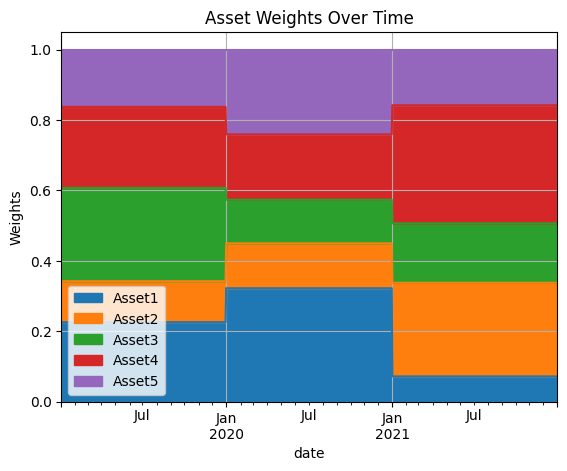

In [23]:
# Plot Area Chart
plt.figure(figsize=(10,6))
portfolio_weights_df.plot.area()
plt.title('Asset Weights Over Time')
plt.ylabel('Weights')
plt.grid(True)

## Historical cumulative returns of the portfolio

In [24]:
portfolio_weights_df

,Asset1,Asset2,Asset3,Asset4,Asset5
date,,,,,
2019-01-02,0.225458,0.116255,0.265003,0.23031,0.162974
2019-01-03,0.225458,0.116255,0.265003,0.23031,0.162974
2019-01-04,0.225458,0.116255,0.265003,0.23031,0.162974
2019-01-07,0.225458,0.116255,0.265003,0.23031,0.162974
2019-01-08,0.225458,0.116255,0.265003,0.23031,0.162974
...,...,...,...,...,...
2021-12-27,0.071307,0.266093,0.168775,0.33547,0.158356
2021-12-28,0.071307,0.266093,0.168775,0.33547,0.158356
2021-12-29,0.071307,0.266093,0.168775,0.33547,0.158356


In [25]:
# Calculate daily returns (in weights %) of the portfolio
weights_returns = (daily_returns_assets * portfolio_weights_df).sum(axis=1)

In [26]:
# Cumulative returns
cumulative_returns = (1 + weights_returns).cumprod()

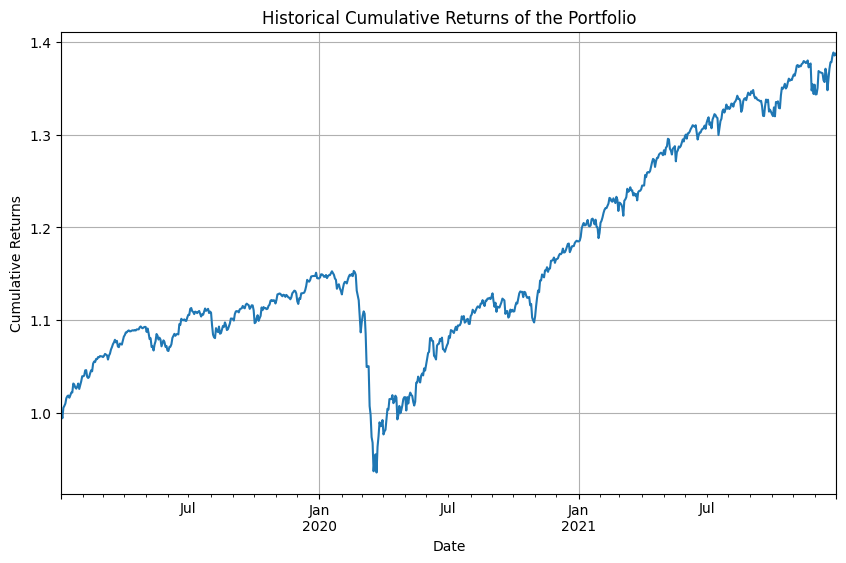

In [27]:
# Plot cumulative returns
plt.figure(figsize=(10, 6))
cumulative_returns.plot()
plt.title('Historical Cumulative Returns of the Portfolio')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.grid(True)

## Annualized returns

In [28]:
# Calculate total return (final cumulative return - initial cumulative return)
total_return = cumulative_returns.iloc[-1] - 1  # subtracting 1 to remove the initial investment

In [29]:
# Calculate investment period
start_date = cumulative_returns.index[0]
end_date = cumulative_returns.index[-1]
investment_period_days = (end_date - start_date).days
investment_period_years = investment_period_days / 365  # 1 year = 365 days

In [30]:
# Adjusting to annual time:
annualized_return = (((1 + total_return) ** (1 / investment_period_years)) - 1).round(2)
print(f"Portfolio's Annual return: {annualized_return}")

Portfolio's Annual return: 0.11


## Annualized Volatility

In [31]:
# Calculate daily returns from cumulative returns
daily_returns_of_cumulative = cumulative_returns.pct_change()

In [32]:
# Calculate standard deviation of daily returns (cumulative) to get volatility
volatility = daily_returns_of_cumulative.std()

In [33]:
# Annualize volatility
annualized_volatility = (volatility * np.sqrt(261)).round(2)
# Display results:
print(f"Portfolio's Annualized Volatility: {annualized_volatility}")

Portfolio's Annualized Volatility: 0.09


## Area Chart of Asset Weights Grouped by Family

In [34]:
asset_information_df

,Name,Family
0,Asset1,Fixed Income
1,Asset2,Fixed Income
2,Asset3,Equity
3,Asset4,Equity
4,Asset5,Alternative


In [35]:
portfolio_weights_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 783 entries, 2019-01-02 to 2021-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Asset1  783 non-null    float64
 1   Asset2  783 non-null    float64
 2   Asset3  783 non-null    float64
 3   Asset4  783 non-null    float64
 4   Asset5  783 non-null    float64
dtypes: float64(5)
memory usage: 36.7 KB


In [36]:
# Create a new df by 'Family'
new_portfolio_weights_with_family = pd.DataFrame(index=portfolio_weights_df.index)

# Create columns in new weights-family df:
new_portfolio_weights_with_family['Fixed Income'] = portfolio_weights_df['Asset1'] + portfolio_weights_df['Asset2']
new_portfolio_weights_with_family['Equity'] = portfolio_weights_df['Asset3'] + portfolio_weights_df['Asset4']
new_portfolio_weights_with_family['Alternative'] = portfolio_weights_df['Asset5']

In [37]:
new_portfolio_weights_with_family.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 783 entries, 2019-01-02 to 2021-12-31
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Fixed Income  783 non-null    float64
 1   Equity        783 non-null    float64
 2   Alternative   783 non-null    float64
dtypes: float64(3)
memory usage: 24.5 KB


<Figure size 1000x600 with 0 Axes>

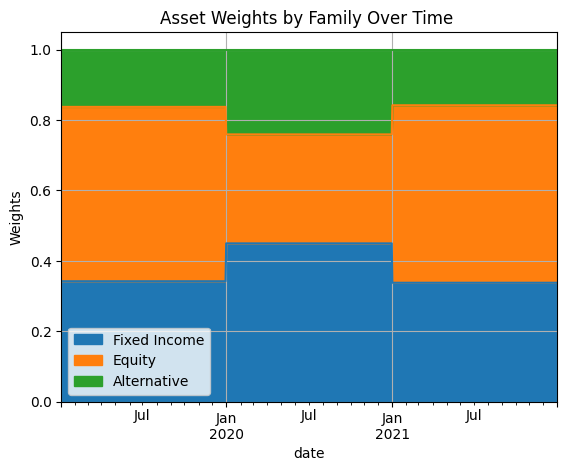

In [38]:
# Plot Area Chart (by Family):
plt.figure(figsize=(10,6))
new_portfolio_weights_with_family.plot.area()
plt.title('Asset Weights by Family Over Time ')
plt.ylabel('Weights')
plt.grid(True)